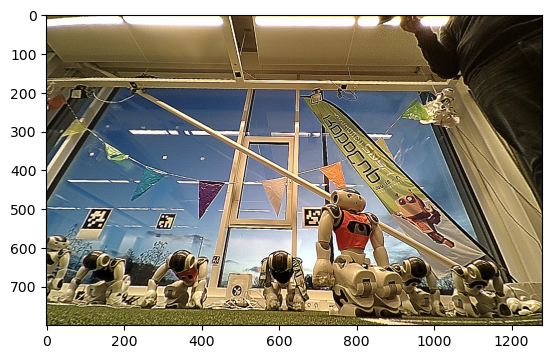

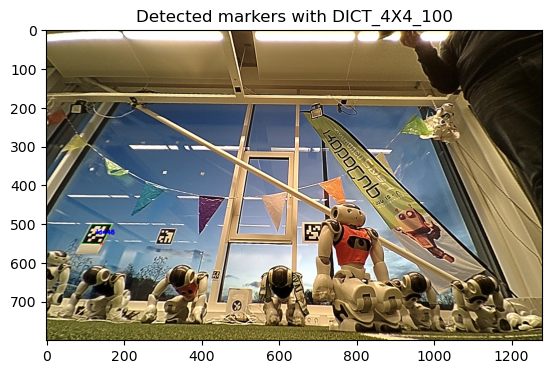

In [2]:
import cv2
import cv2.aruco as aruco
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

RETDICT = {
    aruco.DICT_4X4_100: "DICT_4X4_100",
    aruco.DICT_5X5_100: "DICT_5X5_100",
    aruco.DICT_6X6_100: "DICT_6X6_100",
    aruco.DICT_7X7_100: "DICT_7X7_100",
    aruco.DICT_APRILTAG_36h11: "DICT_APRILTAG_36h11",
    aruco.DICT_APRILTAG_25h9: "DICT_APRILTAG_25h9",
    aruco.DICT_APRILTAG_16H5: "DICT_APRILTAG_16H5",
    aruco.DICT_APRILTAG_36h10: "DICT_APRILTAG_36h10",
    aruco.DICT_APRILTAG_36h11: "DICT_APRILTAG_36h11",
    aruco.DICT_APRILTAG_36h10: "DICT_APRILTAG_36h10",
    aruco.DICT_APRILTAG_25h9: "DICT_APRILTAG_25h9",
}


# Dimensions in mm
A = 9000  # Field length
B = 6000  # Field width
C = 50  # Line width
D = 100  # Penalty mark size
E = 600  # Goal area length
F = 2200  # Goal area width
G = 1650  # Penalty area length
H = 4000  # Penalty area width
I = 1300  # Penalty mark distance
J = 1500  # Center circle diameter
K = 2700  # Border strip width

# Unique marker keys with (x, x, z (in mm), length_of_square (in m))
markers = {
    # window
    # "36H11_
    "79": (-4500, 1060 + 3000 + 50, 510, 0.08),
    # "36H11_
    "26": (-4500 + 450, 130 + 1060 + 3000 + 50, 1080, 0.235),
    # "36H12_
    "67": (-4500 + 450 + 530 + 80, 130 + 1060 + 3000 + 50, 1000, 0.2),
    # "36H11_
    "69": (-1800, 620 + 3000 + 50, 500, 0.08),
    # "36H11_
    "18": (0, 130 + 1060 + 3000 + 50, 1050, 0.28),
    # "36H12_
    "47": (840, 130 + 1060 + 3000 + 50, 1050, 0.2),
    # "36H11_
    "9": (840 + 850, 1060 + 3000 + 50, 500, 0.08),
    # "36H11_
    "66": (840 + 850 + 1150, 130 + 1060 + 3000 + 50, 1100, 0.235),
    # tables
    # "36H11_
    "39": (4500, 1100, 500, 0.08),
    # "36H11_
    "46": (4550 + 820, 0, 1680, 0.235),  # the one up
    # "36H12_
    "57": (4550 + 820, 0, 1000, 0.2),  # the lower one
    # "36H11_
    "49": (4500, -1100, 500, 0.08),
    # wall
    # "36H11_
    "16": (2850, -2000 - 3005, 1070, 0.235),
    # "36H11_
    "19": (2850 - 1050, -2000 - 3005, 510, 0.08),
    # "7x7_
    "37": (2850 - 1050 - 850, -2000 - 3005, 1000, 0.2),
    # "36H11_
    "8": (2850 - 1050 - 850 - 1050, -2000 - 3005, 500, 0.08),  # one on the bottom
    # "36H11_
    "29": (2850 - 1050 - 850 - 1050, -2000 - 3005, 1060, 0.275),  # one on top
    # "36H11_
    "59": (-2800 + 1050, -120 - 3005, 510, 0.08),  # column one
    # "7x7_
    "27": (-2800, -2000 - 3005, 1000, 0.2),  #
    # "36H11_
    "36": (-2800 - 900, -2000 - 3005, 1080, 0.235),
    # ducks
    # "7x7_
    "7": (-4600 - 50 - 930, 0, 1680, 0.2),  # lower one in column
    # "36H11_
    "56": (-4600 - 50 - 930, 0, 1000, 0.235),  # top one in column
    # "36H11_
    "89": (-4500, -1100, 450, 0.08),
    # "36H11_
    "99": (-4500, 1100, 500, 0.08),  # window
}


def detect_aruco_markers(image):
    # Convert the image to grayscale
    # UnSharpen the image
    blurred = cv2.GaussianBlur(image, (3, 3), 5)
    image = cv2.addWeighted(image, 3, blurred, -2, 0)

    # Sharpness filter 4x4
    # sharpen_filter = np.array(
    #     [[-1, -1, -1, -1], [-1, 9, 9, -1], [-1, 9, 9, -1], [-1, -1, -1, -1]]
    # )
    # sharpened = cv2.filter2D(image, cv2.CV_8U, sharpen_filter)
    # image = cv2.addWeighted(image, 1.5, sharpened, -0.2, 0)
    plt.imshow(image[..., ::-1])
    plt.show()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    retdict = RETDICT.copy()

    for key in retdict:
        aruco_dict = aruco.Dictionary_get(key)
        parameters = aruco.DetectorParameters_create()
        parameters.adaptiveThreshWinSizeStep = 1
        parameters.adaptiveThreshWinSizeMin = 3
        parameters.aprilTagMinWhiteBlackDiff = 3

        corners, ids, rejectedImgPoints = aruco.detectMarkers(
            gray, aruco_dict, parameters=parameters
        )
        retdict[key] = (corners, ids, rejectedImgPoints)
    return retdict


# Load the image
image_path = "/Users/Matey/project/var_extensions/line_detection_pipeline/debug/2024-11-19 17:00:10.png"
image = cv2.imread(image_path)

# Detect AruCo markers
retdict = detect_aruco_markers(image)

# Get the detected markers
for key, desci in RETDICT.items():
    corners, ids, rejectedImgPoints = retdict[key]
    if ids is not None:
        viz = aruco.drawDetectedMarkers(image.copy(), corners, ids)
        plt.title(f"Detected markers with {desci}")
        plt.imshow(viz[..., ::-1])
        plt.show()